In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Difdoug\Difdoug_NW_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.113880,0.042485,1.97890,1.83630,2.88660,2.46960,0.21541,3.09000,NaN,0.51035,0.03043,0.100660
1,0.029389,0.206580,NaN,1.43430,3.12990,1.27780,1.42850,0.14333,1.19480,2.13180,0.98473,3.844500
2,-1.115400,0.217560,NaN,1.33710,3.76820,1.21000,3.99630,2.21730,3.90290,1.51440,2.43890,0.633580
3,-0.539160,-0.061874,0.36486,0.33278,0.19027,0.56716,NaN,2.35270,0.66126,3.13510,NaN,3.734600
4,-0.268400,-1.006000,2.88220,1.56160,3.20140,3.37740,1.52260,0.98475,3.10940,3.65640,3.91720,0.947060
...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1.867100,-4.729200,3.72580,3.70480,0.88269,0.35406,1.62780,3.29400,1.08500,0.15740,0.46504,2.851400
396,0.264630,-6.107600,NaN,1.33770,1.41870,1.68610,1.09510,3.79360,0.12790,0.54249,3.36580,3.755600
397,-3.479100,-1.993300,1.32480,1.77210,2.55090,1.47010,0.92540,1.84110,3.47730,0.95496,1.52630,2.123800
398,NaN,-0.411470,2.49480,0.39655,2.99900,3.41010,2.95160,0.27800,0.99059,3.43740,1.81620,0.087212


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	43
float64		column 2	36
float64		column 3	37
float64		column 4	43
float64		column 5	37
float64		column 6	30
float64		column 7	36
float64		column 8	18
float64		column 9	43
float64		column 10	37
float64		column 11	48
float64		column 12	30


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
count,357.000000,364.000000,363.000000,357.000000,363.000000,370.000000,364.000000,382.000000,357.000000,363.000000,352.000000,370.000000
mean,-0.039978,-0.006158,2.040120,1.866424,1.885261,1.984612,2.025449,1.987299,2.013992,2.005226,1.915115,1.956718
std,2.396582,2.614592,1.115696,1.099943,1.132298,1.132548,1.149266,1.134550,1.113894,1.122532,1.108389,1.175795
min,-7.771000,-6.828400,0.010405,0.011551,0.000530,0.018503,0.016500,0.007321,0.007216,0.055837,0.006786,0.001972
25%,-0.559020,-0.738927,1.138600,0.962850,0.879360,1.052125,1.030075,1.038375,1.153500,1.060000,0.926330,0.948895
50%,-0.056236,-0.006388,2.096900,1.758400,1.862900,2.021800,2.101400,1.979350,2.106800,2.053500,1.871500,1.914800
75%,0.692500,0.720610,2.955100,2.724600,2.856100,2.957325,2.969400,3.020100,2.940300,3.000150,2.880100,2.945850
max,8.409300,6.777100,3.976400,3.993400,3.979000,3.992300,3.996300,3.995000,3.985500,3.984300,3.930600,3.996000


<AxesSubplot:>

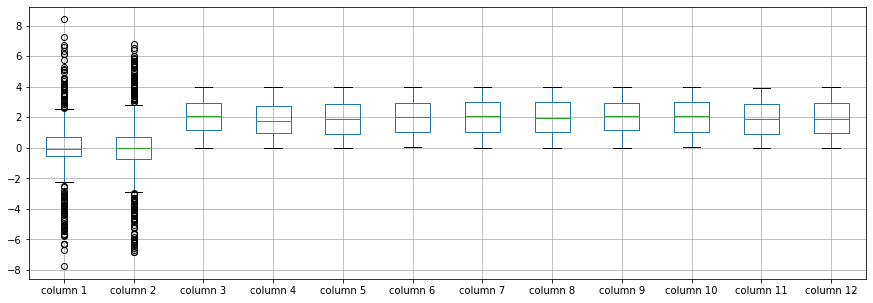

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    -0.039978
column 2    -0.006158
column 3     2.040120
column 4     1.866424
column 5     1.885261
column 6     1.984612
column 7     2.025449
column 8     1.987299
column 9     2.013992
column 10    2.005226
column 11    1.915115
column 12    1.956718
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
column 1,1.000000,0.056200,-0.044132,-0.042155,0.071504,-0.011529,0.016125,0.049052,0.008933,0.021168,0.135021,-0.010042
column 2,0.056200,1.000000,-0.014087,0.040220,-0.105725,-0.105595,0.028145,0.033979,-0.019567,-0.032855,-0.068383,0.111808
column 3,-0.044132,-0.014087,1.000000,0.028683,-0.030771,-0.043531,-0.071897,0.030455,0.112473,-0.008800,-0.090447,-0.028830
column 4,-0.042155,0.040220,0.028683,1.000000,0.033388,0.093456,0.027612,0.105307,0.066308,0.006399,-0.028161,-0.021729
column 5,0.071504,-0.105725,-0.030771,0.033388,1.000000,0.071116,0.028315,0.001416,0.037164,0.057108,-0.007718,-0.014401
column 6,-0.011529,-0.105595,-0.043531,0.093456,0.071116,1.000000,0.014215,0.073278,0.019439,-0.004062,0.031739,-0.053504
column 7,0.016125,0.028145,-0.071897,0.027612,0.028315,0.014215,1.000000,-0.022534,0.062079,0.033884,0.017340,-0.043611
column 8,0.049052,0.033979,0.030455,0.105307,0.001416,0.073278,-0.022534,1.000000,0.040097,-0.154267,-0.064541,-0.040584
column 9,0.008933,-0.019567,0.112473,0.066308,0.037164,0.019439,0.062079,0.040097,1.000000,0.008390,0.033075,-0.004245
column 10,0.021168,-0.032855,-0.008800,0.006399,0.057108,-0.004062,0.033884,-0.154267,0.008390,1.000000,0.034855,0.017320


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [12,12+45,12+45+45,12+45+45+45,12+45+45+45+45,12+45+45+45+45+45,12+45+45+45+45+45+45,12+45+45+45+45+45+45+45,12+45+45+45+45+45+45,12+45+45+45+45+45,12+45+45+45+45,12+45+45+45,12+45+45,12+45,12], vae_layer = False, seed = 45)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [12]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 24.89489471435547
Epoch: 1 , loss: 24.747976837158202
Epoch: 2 , loss: 24.678130645751953
Epoch: 3 , loss: 24.002252655029295
Epoch: 4 , loss: 22.130698852539062
Epoch: 5 , loss: 21.512722396850585
Epoch: 6 , loss: 21.227537536621092
Epoch: 7 , loss: 20.921509323120116
Epoch: 8 , loss: 20.693794021606447
Epoch: 9 , loss: 20.511298141479493
Epoch: 10 , loss: 20.23323959350586
Epoch: 11 , loss: 20.01914909362793
Epoch: 12 , loss: 19.79274200439453
Epoch: 13 , loss: 19.4713623046875
Epoch: 14 , loss: 19.253218994140624
Epoch: 15 , loss: 19.232433319091797
Epoch: 16 , loss: 18.84087043762207
Epoch: 17 , loss: 18.671710319519043
Epoch: 18 , loss: 18.463632926940917
Epoch: 19 , loss: 18.440144653320313
Epoch: 20 , loss: 18.293210525512695
Epoch: 21 , loss: 18.211502151489256
Epoch: 22 , loss: 18.010757904052735
Epoch: 23 , loss: 17.976079711914064
Epoch: 24 , loss: 17.54960235595703
Epoch: 25 , loss: 17.4884

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(400, 12)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    -0.705950
column 2     0.128930
column 3     1.058100
column 4     2.136200
column 5     2.148600
column 6     2.245800
column 7     0.927228
column 8     2.227200
column 9     1.943500
column 10    1.987000
column 11    2.470700
column 12    0.368260
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Difdoug.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.0,0.551553,0.00000,0.000000,0.0
1,0.000000,0.000000,0.191615,0.0,0.0,0.0,0.00000,0.0,0.000000,0.00000,0.000000,0.0
2,0.000000,0.000000,-1.027207,0.0,0.0,0.0,0.00000,0.0,0.000000,0.00000,0.000000,0.0
3,0.000000,0.000000,0.000000,0.0,0.0,0.0,-0.48641,0.0,0.000000,0.00000,-2.794543,0.0
4,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.0,0.000000,0.00000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.0,0.000000,0.00000,0.000000,0.0
396,0.000000,0.000000,-2.472524,0.0,0.0,0.0,0.00000,0.0,0.000000,0.00000,0.000000,0.0
397,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.0,0.000000,0.00000,0.000000,0.0
398,-7.371906,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.0,0.000000,0.00000,0.000000,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(47.21491913376601, 163.27447192538312)

In [17]:
NRMS=numerator/denominator
NRMS


0.2891751452446489

In [18]:
new_df.iloc[66,:]

column 1     0.82272
column 2     0.26776
column 3     0.40343
column 4     1.18720
column 5     3.95660
column 6     2.58300
column 7     2.83060
column 8     3.07420
column 9     1.53810
column 10    0.24620
column 11    0.85334
column 12    3.60440
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.113880,0.042485,1.978900,1.83630,2.88660,2.46960,0.21541,3.09000,1.334983,0.51035,0.030430,0.100660
1,0.029389,0.206580,0.680225,1.43430,3.12990,1.27780,1.42850,0.14333,1.194800,2.13180,0.984730,3.844500
2,-1.115400,0.217560,0.583293,1.33710,3.76820,1.21000,3.99630,2.21730,3.902900,1.51440,2.438900,0.633580
3,-0.539160,-0.061874,0.364860,0.33278,0.19027,0.56716,1.17369,2.35270,0.661260,3.13510,1.143557,3.734600
4,-0.268400,-1.006000,2.882200,1.56160,3.20140,3.37740,1.52260,0.98475,3.109400,3.65640,3.917200,0.947060
...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1.867100,-4.729200,3.725800,3.70480,0.88269,0.35406,1.62780,3.29400,1.085000,0.15740,0.465040,2.851400
396,0.264630,-6.107600,1.432876,1.33770,1.41870,1.68610,1.09510,3.79360,0.127900,0.54249,3.365800,3.755600
397,-3.479100,-1.993300,1.324800,1.77210,2.55090,1.47010,0.92540,1.84110,3.477300,0.95496,1.526300,2.123800
398,-0.078906,-0.411470,2.494800,0.39655,2.99900,3.41010,2.95160,0.27800,0.990590,3.43740,1.816200,0.087212


In [20]:
imputations[-1].to_excel("Difdoug_NW_10(imp).xlsx", index=False, header=False)